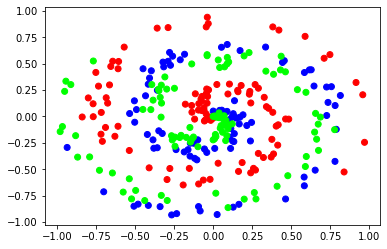

In [1]:
import numpy as np 
np.random.seed(0)

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X,y = spiral_data(100,3)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap="brg")
plt.show()
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # No need to do transpose
        self.biases = np.zeros((1, n_neurons)) #if the network is dying because of many zeroes we can adjust this to non zero numbers
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        negative_log = -np.log(correct_confidences)
        return negative_log

In [2]:
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()

In [3]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [5]:
for iteration in range(10000):
    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 loss: 1.1010508889711657 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0993537331516345 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0988902048467342 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.098276375155205 acc: 0.36
New set of weights found, iteration: 8 loss: 1.0982084840982167 acc: 0.33666666666666667
New set of weights found, iteration: 9 loss: 1.0977140813940174 acc: 0.34
New set of weights found, iteration: 10 loss: 1.0970951256544677 acc: 0.35333333333333333
New set of weights found, iteration: 18 loss: 1.0968996174788022 acc: 0.3466666666666667
New set of weights found, iteration: 23 loss: 1.0967100916311323 acc: 0.33
New set of weights found, iteration: 30 loss: 1.0965257339896364 acc: 0.33
New set of weights found, iteration: 33 loss: 1.0959501189284404 acc: 0.36
New set of weights found, iteration: 35 loss: 1.0957577643414227 acc: 0.3233333333333333
New set

In [ ]:
#Not much improvement is seen without using calculus and its derivatives